# Load Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")

In [3]:
movies.shape

(4803, 20)

In [4]:
credits.shape

(4803, 4)

In [5]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [6]:
credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [7]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [8]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [9]:
# movie_id (credits) == id(movies)

# Merge Datasets

Merge into 1 dataframe (easier to handle)

Can merge on:
1. movie_title
2. movie_id

We are choosing: movie_title

In [10]:
movies.shape

(4803, 20)

In [11]:
credits.shape

(4803, 4)

In [12]:
new_movies = movies.merge(credits, on="title")

In [13]:
# 20+4-1 =23 (overlapping column appears once only)

new_movies.shape

(4809, 23)

# Pre Processing

Now we will drop unwanted columns from our combined dataframe

Removing:
1. budget
2. homepage
3. original_language (bc as per column data observation, 95% data is English so very imbalanced dataset FOR THIS COLUMN)
4. original_title (can be of regional dialect)
5. popularity (numeric measure not useful for this approach of generating tags per movie)
6. production_companies
7. production_countries
8. release_date (COULD BE USEFUL FOR PERIOD MOVIES)
9. revenue
10. runtime
11. spoken_languages
12. status
13. tagline (overview better description)
14. vote_average (numerical column)
15. vote_count (numerical)

Keeping:
1. genre
2. id (will be useful later to fetch movie images)
3. keywords
4. title (bc dropped original_title)
5. overview
6. cast
7. crew

In [14]:
# Observing all column wise information - I

new_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [15]:
# Observing all column wise information - II

new_movies['original_language'].value_counts()

,count
original_language,
en,4510
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
ko,12


In [16]:
# Observing all column wise information - III

new_movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.809000e+03,4809.000000,4809.000000,4.809000e+03,4807.000000,4809.000000,4809.000000,4809.000000
mean,2.902780e+07,57120.571429,21.491664,8.227511e+07,106.882255,6.092514,690.331670,57120.571429
std,4.070473e+07,88653.369849,31.803366,1.628379e+08,22.602535,1.193989,1234.187111,88653.369849
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.800000e+05,9012.000000,4.667230,0.000000e+00,94.000000,5.600000,54.000000,9012.000000
50%,1.500000e+07,14624.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14624.000000
75%,4.000000e+07,58595.000000,28.350529,9.291317e+07,118.000000,6.800000,737.000000,58595.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


After filtering out CHOSEN columns:

In [17]:
new_movies = new_movies[['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew']]

In [18]:
new_movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Now target:
* Preprocess data in keywords, cast, crew columns
* Make a large string by concatenating info in columns (overview, genre, keywords, top 3 casts, director name from crew)   



In [19]:
# check for missing values

new_movies.isnull().sum()

,0
movie_id,0
title,0
overview,3
genres,0
keywords,0
cast,0
crew,0


In [20]:
# Since overview column is VERY IMP for our project and we only have 3 missing
# We will drop the 3 rows

new_movies.dropna(inplace=True)

# Now null count of overview column will become 0 isntead of 3 bc inplace change

In [21]:
# Check for duplicates

new_movies.duplicated().sum()

# No duplicate dtaa found

np.int64(0)

PreProcessing genre column

In [22]:
# let's check how data in the genre column is organized for ANY row (0th index chosen)

new_movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [23]:
# Using literal_eval bc the dictionary is inside a string

# Implementation 1
import ast

def extract_items(obj):
    genres = []
    for i in ast.literal_eval(obj):
        genres.append(i['name'])
    return genres


#  Implementaton 2
# def extract_items(obj):
#     obj = eval(obj)
#     genres = []
#     for i in obj:
#         genres.append(i['name'])
#     return genres

print(extract_items(new_movies.iloc[0].genres))

['Action', 'Adventure', 'Fantasy', 'Science Fiction']


In [24]:
# Interesting: using .apply() to call a function

new_movies['genres'] = new_movies['genres'].apply(extract_items)

In [25]:
new_movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


PreProcessing keywords column

In [26]:
new_movies.iloc[0].keywords

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [27]:
new_movies['keywords'] = new_movies['keywords'].apply(extract_items)

In [28]:
new_movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


PreProcess cast column

In [29]:
new_movies.iloc[0].cast

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [30]:
# We'll deal with top 10 cast member names (NOT 'character' but rather 'name')

def extract_top_n(content, n):
    content = ast.literal_eval(content)
    cast = []
    for i in content:
        cast.append(i['name'])
    return cast[:n]


In [31]:
new_movies['cast'] = new_movies['cast'].apply(extract_top_n, n=5)


In [32]:
new_movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [33]:
movies_list = []
print(movies.shape)
i = 0
while True:
    movies_list.append(movies.iloc[i].title)
    i += 1
    if i == movies.shape[0]:
        break

print(movies_list)

(4803, 20)
['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 

PreProcessing crew column

In [34]:
new_movies.iloc[0].crew

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [35]:
def extract_crew(content, jobs):
    content = ast.literal_eval(content)
    crew = []
    for i in content:
        if i['job'] in jobs:
            crew.append(i['name'])
    return crew


In [36]:
new_movies['crew'] = new_movies['crew'].apply(extract_crew, jobs = ['Director'])

In [37]:
new_movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]


PreProcessing overview column

In [38]:
new_movies['overview'] = new_movies['overview'].apply(lambda x: x.split())

In [39]:
new_movies.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton]


Final PreProcessing:
1. all lower case
2. removing spaces between 2 words (eg. in actor names)
    * So that 'Sam' in "Sam Etherway" and "Sam Tonnyhill" is not evaluated similarly

In [40]:
new_movies['cast'] = new_movies['cast'].apply(lambda x: [i.replace(" ", "") for i in x])
new_movies['crew'] = new_movies['crew'].apply(lambda x: [i.replace(" ", "") for i in x])
new_movies['genres'] = new_movies['genres'].apply(lambda x: [i.replace(" ", "") for i in x])
new_movies['keywords'] = new_movies['keywords'].apply(lambda x: [i.replace(" ", "") for i in x])


In [41]:
new_movies['cast'] = new_movies['cast'].apply(lambda x: [i.lower() for i in x])
new_movies['crew'] = new_movies['crew'].apply(lambda x: [i.lower() for i in x])
new_movies['genres'] = new_movies['genres'].apply(lambda x: [i.lower() for i in x])
new_movies['keywords'] = new_movies['keywords'].apply(lambda x: [i.lower() for i in x])


In [42]:
# Concatenate all columns to create "tags" column
new_movies['tags'] = new_movies['overview'] + new_movies['genres'] + new_movies['keywords'] + new_movies['cast']

# Convert the list into a string
new_movies['tags'] = new_movies['tags'].apply(lambda x: " ".join(x))

In [43]:
# Filter out columns movie_id, title and tags only
# We can either drop the other columns or copy these tgarget columns and create a new dataframe


new_df = new_movies[['movie_id', 'title', 'tags']]

In [44]:
new_df.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [45]:
new_df['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver stephenlang michellerodriguez'

# Word Vectorization (Bag of Words)

Theory:
* Make a frequency table of N most common words from corpus (large text)
* Note: We ignore stop words i.e. words which are used for sentence construction but don't affect sentence meaning (eg. English stop-words like are, in, a.. etc)
* This will be the vector format of the corpus (paragraph)

* Note: We will also have to apply stemming to use root word for each word in the frequency distribution so words like "loving", "loved", "lover" are all treated as equivalent to "love" [do this FIRST; then VECTORISE]
* Repeat for every row in tags columns

In [46]:
# For stemming

!pip install nltk
import nltk

In [47]:
# We will apply stemming to each word of each row in tags column

def stem(text):
    y = []
    for i in text.split():
        y.append(nltk.PorterStemmer().stem(i))

    return " ".join(y)

new_df['tags'] = new_df['tags'].apply(stem)

/tmp/ipython-input-663033999.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


In [48]:
# Now we can generate vectors from stem-ed/root version of words
# no need to do manually; use scikit learn
# we will use 5000 words for our project but we can experiment with better max_features:performance ratios

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')

In [49]:
cv.fit_transform(new_df['tags']).toarray().shape

(4806, 5000)

In [50]:
bow_vectors = cv.fit_transform(new_df['tags']).toarray()

In [51]:
# vector representation of tags in index 0 of dataframe

print(bow_vectors[0])

[0 0 0 ... 0 0 0]


In [52]:
# CHECKING THE SET OF 5000 MOST FREQUENT WORDS USED FOR BagofWords

vocab = cv.get_feature_names_out()
print(vocab)
for i in vocab:
    print(i)

['000' '007' '10' ... 'zone' 'zoo' 'zooeydeschanel']
000
007
10
100
11
12
13
14
15
16
17
18
18th
18thcenturi
19
1910
1920
1930
1940
1950
1950s
1960
1960s
1970
1970s
1980
1985
1990
19th
19thcenturi
20
200
2009
20th
24
25
30
300
3d
40
50
500
60
70
aaron
aaroneckhart
aarontaylor
abandon
abduct
abigailbreslin
abil
abl
aboard
abov
abus
academi
accept
access
accid
accident
acclaim
accompani
accomplish
account
accus
ace
achiev
act
action
actionhero
activ
activist
activities
actor
actress
actual
adam
adambrodi
adamsandl
adamscott
adapt
add
addict
adjust
admir
admit
adolesc
adopt
ador
adrienbrodi
adult
adultanim
adulteri
adulthood
advanc
adventur
adventure
adventures
advertis
advic
advis
affair
affect
afghanistan
africa
african
africanamerican
aftercreditssting
afterlif
aftermath
ag
age
agediffer
agenc
agency
agenda
agent
agents
aggress
ago
agre
ahead
aid
aidanquinn
ail
aim
air
airplan
airplanecrash
airport
aka
al
alabama
alan
alanalda
alanarkin
alanrickman
alaska
albert
albertbrook
alcatraz
al

# Word Vectorization (TF-IDF)

Theory:
1. Term Frequence (TF):
    * No. of repitition of a word in sentence / No. of words in sentence
2. Inverse Document Frequence (IDF):
    * log ( No. of total sentences / No. of sentences containing word )

We then multiply TF * IDF to create the vector

Cons of BoW that TF-IDF Addresses:
* word vectors capture no meaning/importance of that word for a particular corpus

In [53]:
# Use TF-IDF instead of CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_vectors = tfidf.fit_transform(new_df['tags']).toarray()

# Word Vectorization (Sentence Transformers)

In [54]:
from sentence_transformers import SentenceTransformer

In [55]:
# Load pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')  # Fast & good
# OR: 'all-mpnet-base-v2' (slower but better)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [56]:
# Create embeddings
movie_embeddings = model.encode(new_df['tags'].tolist())

Note: Instead of saving the entire model, we can save the embeddings in a separate column and append to dataframe too

In [57]:
movie_embeddings.shape

(4806, 384)

In [58]:
movie_embeddings[0]

array([-2.75462493e-02,  9.18171108e-02, -1.53567148e-02, -4.86036092e-02,
       -6.56555742e-02, -1.96644124e-02,  1.29261706e-02, -7.33128637e-02,
        2.78884750e-02,  3.88686135e-02,  7.97546729e-02, -1.52722389e-01,
       -1.11822588e-02, -4.36122306e-02, -3.57674584e-02, -1.05915461e-02,
       -4.15202118e-02,  5.09301061e-03, -2.05815714e-02,  6.25065388e-03,
       -3.26524340e-02, -2.19722129e-02, -1.27505166e-02,  2.81433500e-02,
       -3.88775207e-02,  4.83448692e-02, -1.11209520e-03,  2.24734191e-02,
        2.38081589e-02, -4.01491039e-02, -2.67368108e-02,  1.57196164e-01,
       -3.96189652e-02,  2.52471492e-02,  2.32158899e-02,  1.28778845e-01,
       -3.41142789e-02, -1.06878974e-01,  2.46399883e-02, -3.80903706e-02,
       -5.05299754e-02, -6.24367520e-02, -1.62568560e-03, -8.05367976e-02,
       -8.87629911e-02, -8.13953578e-02, -3.03606093e-02, -3.75568680e-02,
        7.80387223e-02, -3.15741673e-02, -8.43674988e-02, -1.47466836e-02,
       -4.91280807e-03,  

# Compare vectors for core recommendation system

Theory:
* Not calculate Euclidean distance
* Calculate cosine similarity (since high dimensional vector)
* Cosine difference more = less similar data points (vectors)


* We will generate a matrix which will encapsulate how similar EACH movie is to EVERY OTHER movie

In [59]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_bow = cosine_similarity(bow_vectors)
similarity_tfidf = cosine_similarity(tfidf_vectors)
similarity_st = cosine_similarity(movie_embeddings)

In [60]:
print(similarity_bow.shape, similarity_tfidf.shape, similarity_st.shape)

(4806, 4806) (4806, 4806) (4806, 4806)


In [61]:
# Checking how similar index=0 movie is with every other movie

print(similarity_bow[0])

[1.         0.08006408 0.08492078 ... 0.04441156 0.         0.        ]


In [88]:
# main pipeline

def recommend(movie, similarity, k = 5):
    # first, based on movie name need to find the movie_id
    # then use the movie_id/index to get index to check from similarity matrix
    # find top K values in that index of similarity matrix BY SORTING
    try:
        index = new_df[new_df['title'] == movie].index[0]         # CHECK EXPERIMENTATION BELOW
        distances = similarity[index]

        # When sorting list, we need largest values so reverse=True
        # After sorting, we will also need the index number of which movies have the top K similairty values; hence: list(enumerate(similarity[index]))
        # When sorting list, we don't want to sort based on index number so key=lambda x: x[1]
        # After everything, we want to suppose output top 5 movie recommendations for each movie; hence [1:5] bc index = 0 will always be 1
        sorted_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:k+1]
        # print(sorted_list)

        movie_list = []
        for i in sorted_list:
            movie_list.append((new_df.iloc[i[0]].title, i[1]))

        # print(movie_list)
        return movie_list
    except:
        print("Movie not found in dataset")


In [63]:
# Important experimentation-I

# Wrong: new-df['Avatar']
new_df['title'] == 'Avatar'

,title
0,True
1,False
2,False
3,False
4,False
...,...
4804,False
4805,False
4806,False
4807,False


In [64]:
# Important experimentation-II

new_df[new_df['title'] == "Avatar"]

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."


In [65]:
# Important experimentation-III

new_df[new_df['title'] == "Avatar"].index

Index([0], dtype='int64')

# Testing (Vectorise using BoW)

In [66]:
r_b_1 = recommend("Toy Story", similarity_bow)
print(r_b_1)

['Toy Story 2', 'Toy Story 3', 'The Adventures of Elmo in Grouchland', "Should've Been Romeo", "Harry Potter and the Philosopher's Stone"]


In [67]:
r_b_2 = recommend("Avatar", similarity_bow)
print(r_b_2)

['Aliens vs Predator: Requiem', 'Independence Day', 'Falcon Rising', 'Battle: Los Angeles', 'Titan A.E.']


In [68]:
r_b_3 = recommend("Batman", similarity_bow)
print(r_b_3)

['Batman', 'Batman & Robin', 'Batman Begins', 'The R.M.', 'Batman Returns']


In [100]:
r_b_4 = recommend("Harry Potter and the Philosopher's Stone", similarity_bow, 15)
print(r_b_4)

[('The Adventures of Elmo in Grouchland', np.float64(0.4834937784152282)), ('1982', np.float64(0.48055045014068587)), ('The R.M.', np.float64(0.46738231078448866)), ('Flying By', np.float64(0.4651889316342639)), ('Juliet and Alfa Romeo', np.float64(0.45647498109908324)), ('The Truman Show', np.float64(0.45162230233094547)), ('Wish I Was Here', np.float64(0.4489585085284262)), ('How to Fall in Love', np.float64(0.4443001208671875)), ('Copying Beethoven', np.float64(0.4430112469403924)), ('Harry Potter and the Order of the Phoenix', np.float64(0.4416300553080503)), ('Krrish', np.float64(0.44163005530805016)), ('Micmacs', np.float64(0.43837365899280223)), ('I Served the King of England', np.float64(0.43818716549893616)), ("Should've Been Romeo", np.float64(0.43447062460935676)), ('Khumba', np.float64(0.430905077342082))]


# Testing (TF-IDF)

In [70]:
r_t_1 = recommend("Toy Story", similarity_tfidf)
print(r_t_1)

['Toy Story 3', 'Toy Story 2', 'Small Soldiers', 'For Your Consideration', 'The 41–Year–Old Virgin Who Knocked Up Sarah Marshall and Felt Superbad About It']


In [71]:
r_t_2 = recommend("Avatar", similarity_tfidf)
print(r_t_2)

['Falcon Rising', 'Aliens', 'Battle: Los Angeles', 'Aliens vs Predator: Requiem', 'Apollo 18']


In [72]:
r_t_3 = recommend("Batman", similarity_tfidf)
print(r_t_3)

['Batman', 'Batman & Robin', 'Batman Returns', 'The Dark Knight Rises', 'Batman Begins']


In [101]:
r_t_4 = recommend("Harry Potter and the Philosopher's Stone", similarity_tfidf, 15)
print(r_t_4)

[('Harry Potter and the Chamber of Secrets', np.float64(0.40314574462744074)), ('Harry Potter and the Goblet of Fire', np.float64(0.3627017953933035)), ('Harry Potter and the Half-Blood Prince', np.float64(0.34494513935807614)), ('Harry Potter and the Order of the Phoenix', np.float64(0.3268371620501089)), ('Harry Potter and the Prisoner of Azkaban', np.float64(0.2913952457357771)), ('Hocus Pocus', np.float64(0.18516549441090696)), ("Dude Where's My Dog?", np.float64(0.16355804067851804)), ('The Adventures of Elmo in Grouchland', np.float64(0.15860361296938036)), ('Just Visiting', np.float64(0.15166126416744471)), ('The Craft', np.float64(0.1453145861616758)), ('Juliet and Alfa Romeo', np.float64(0.14203472094840808)), ('1982', np.float64(0.1387572754446358)), ('The Wiz', np.float64(0.13838852926575548)), ('Airborne', np.float64(0.1364092119528599)), ('The NeverEnding Story', np.float64(0.1349435479397002))]


# Testing (Sentence Embeddings)

In [74]:
r_s_1 = recommend("Toy Story", similarity_st)
print(r_s_1)

['Toy Story 3', 'Toy Story 2', 'The 41–Year–Old Virgin Who Knocked Up Sarah Marshall and Felt Superbad About It', 'The Way Way Back', 'Growing Up Smith']


In [83]:
r_s_2 = recommend("Avatar", similarity_st)
print(r_s_2)

[('Battle: Los Angeles', np.float32(0.56065154)), ('Aliens', np.float32(0.5527289)), ('Independence Daysaster', np.float32(0.5477694)), ('Serenity', np.float32(0.545168)), ('U.F.O.', np.float32(0.53951186))]


In [76]:
r_s_3 = recommend("Batman", similarity_st)
print(r_s_3)

['Batman', 'The Dark Knight', 'Batman Forever', 'Batman Begins', 'The Dark Knight Rises']


In [102]:
r_s_4 = recommend("Harry Potter and the Philosopher's Stone", similarity_st, 15)
print(r_s_4)

[('Harry Potter and the Goblet of Fire', np.float32(0.84675825)), ('Harry Potter and the Half-Blood Prince', np.float32(0.7784868)), ('Harry Potter and the Chamber of Secrets', np.float32(0.7704731)), ('Harry Potter and the Order of the Phoenix', np.float32(0.75433254)), ('Harry Potter and the Prisoner of Azkaban', np.float32(0.70918703)), ('Thunder and the House of Magic', np.float32(0.5602882)), ("Dude Where's My Dog?", np.float32(0.53822297)), ('The Chronicles of Narnia: The Lion, the Witch and the Wardrobe', np.float32(0.5312823)), ('The Adventurer: The Curse of the Midas Box', np.float32(0.5260738)), ('The Borrowers', np.float32(0.5256436)), ('Stuart Little', np.float32(0.50985223)), ('The Princess Bride', np.float32(0.50313467)), ("It's a Wonderful Life", np.float32(0.5012793)), ('Arthur and the Invisibles', np.float32(0.4991049)), ('The Chronicles of Narnia: Prince Caspian', np.float32(0.49763215))]


# Visualization

In [78]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import networkx as nx
from math import pi

In [108]:
def create_network_graph(input_movie, recommendations, save_path=None):

    """
    Creates a network graph showing relationships between input movie and recommendations
    -------------------------------------------------------------------------------------
    - Input movie as central node
    - Recommendations as surrounding nodes
    - Edge thickness = similarity strength
    - Intuitive way to see which recommendations are most similar
    -------------------------------------------------------------------------------------
    """

    # Create the graph structure and add the input movie as the central node
    G = nx.Graph()
    G.add_node(input_movie, node_type='input')

    # Add recommendations as nodes and connect them to input movie
    for rec_movie, score in recommendations:
        G.add_node(rec_movie, node_type='recommendation')

        # weight = similarity score (used for edge thickness)
        G.add_edge(input_movie, rec_movie, weight=score)

    # Calculate layout: Spring layout makes similar nodes cluster together
    # Fix the input movie at the center
    pos = nx.spring_layout(G, k=2, iterations=50, seed=42)

    # Alternative: Circular layout with input at center
    # pos = nx.circular_layout(list(G.nodes())[1:])  # Recommendations in circle
    # pos[input_movie] = np.array([0, 0])  # Input at center

    # Step 5: Create the figure
    fig, ax = plt.subplots(figsize=(14, 10))

    # Step 6: Prepare node colors and sizes
    node_colors = []
    node_sizes = []
    for node in G.nodes():
        if G.nodes[node]['node_type'] == 'input':
            node_colors.append('#FF6B6B')  # Red for input
            node_sizes.append(3000)  # Larger size
        else:
            node_colors.append('#4ECDC4')
            node_sizes.append(2000)


    edges = G.edges()
    weights = [G[u][v]['weight'] for u, v in edges]

    # Scale weights
    edge_widths = [w * 20 for w in weights]


    # edges
    nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.6,
                           edge_color='gray', ax=ax)

    # nodes
    nx.draw_networkx_nodes(G, pos, node_color=node_colors,
                           node_size=node_sizes, alpha=0.9, ax=ax)

    # labels
    nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold',
                            font_family='sans-serif', ax=ax)

    # Add edge labels (similarity scores)
    edge_labels = {(u, v): f'{G[u][v]["weight"]:.3f}' for u, v in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=16, ax=ax)

    # Customize plot
    ax.set_title(f'Recommendation Network for "{input_movie}"',
                 fontsize=16, weight='bold', pad=20)
    ax.axis('off')
    ax.margins(0.2)

    # legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Input Movie',
               markerfacecolor='#FF6B6B', markersize=15),
        Line2D([0], [0], marker='o', color='w', label='Recommendations',
               markerfacecolor='#4ECDC4', markersize=15),
        Line2D([0], [0], color='gray', linewidth=3, label='High Similarity'),
        Line2D([0], [0], color='gray', linewidth=1, label='Lower Similarity')
    ]
    ax.legend(handles=legend_elements, loc='upper left', fontsize=10)

    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Network graph saved to {save_path}")

    # plt.show()

Network graph using Bag of Words vectorization generated successfully.



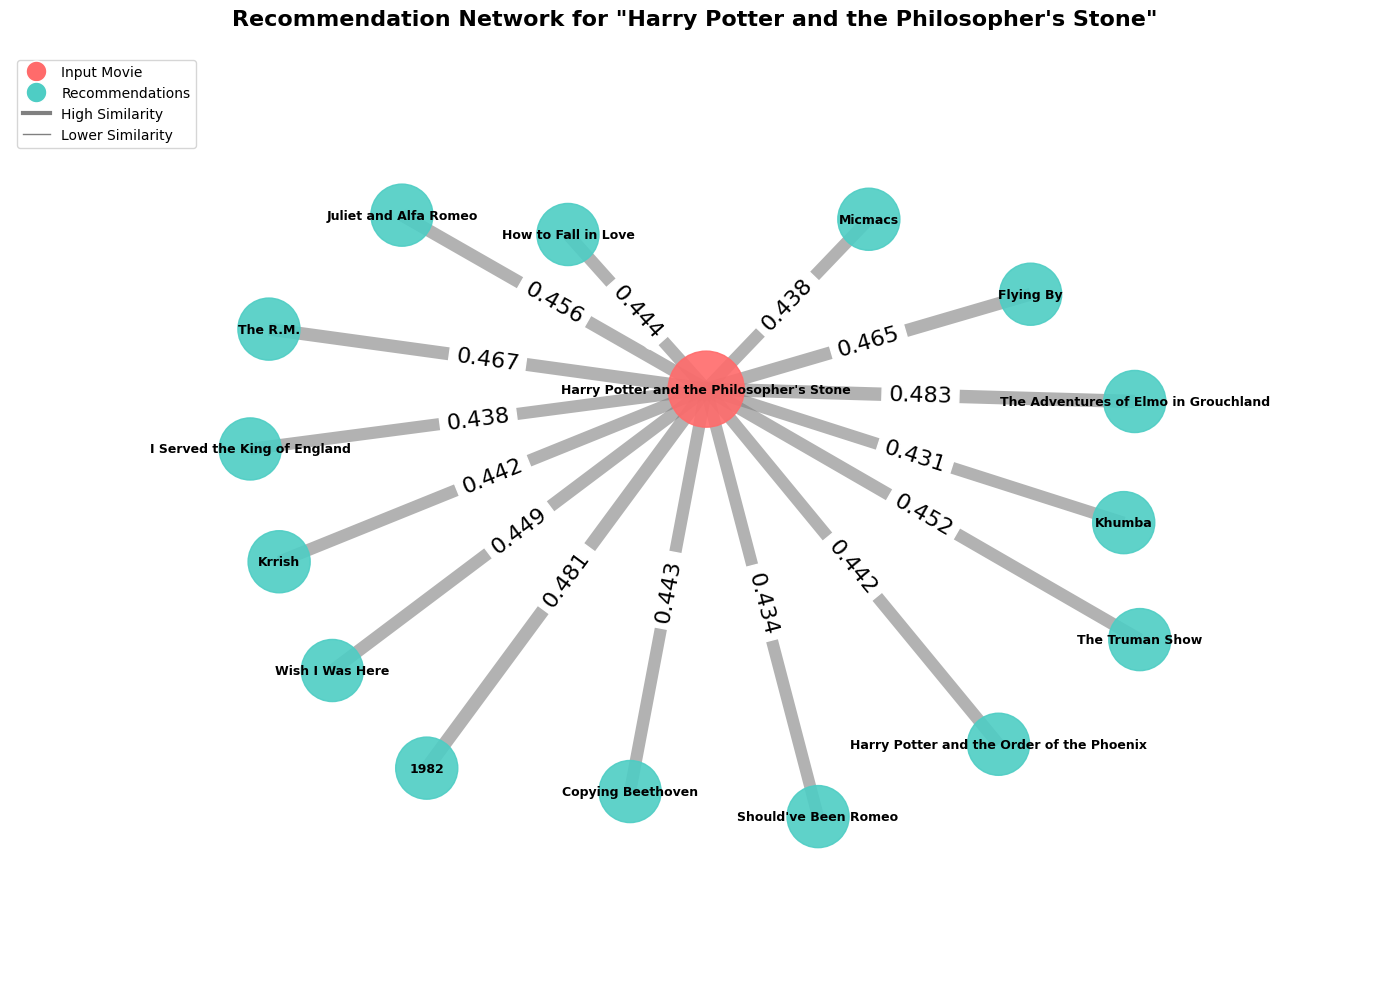

In [111]:
create_network_graph("Harry Potter and the Philosopher's Stone", r_b_4, save_path=None)
print("Network graph using Bag of Words vectorization generated successfully.\n")

Network graph using TF-IDF vectorization generated successfully.



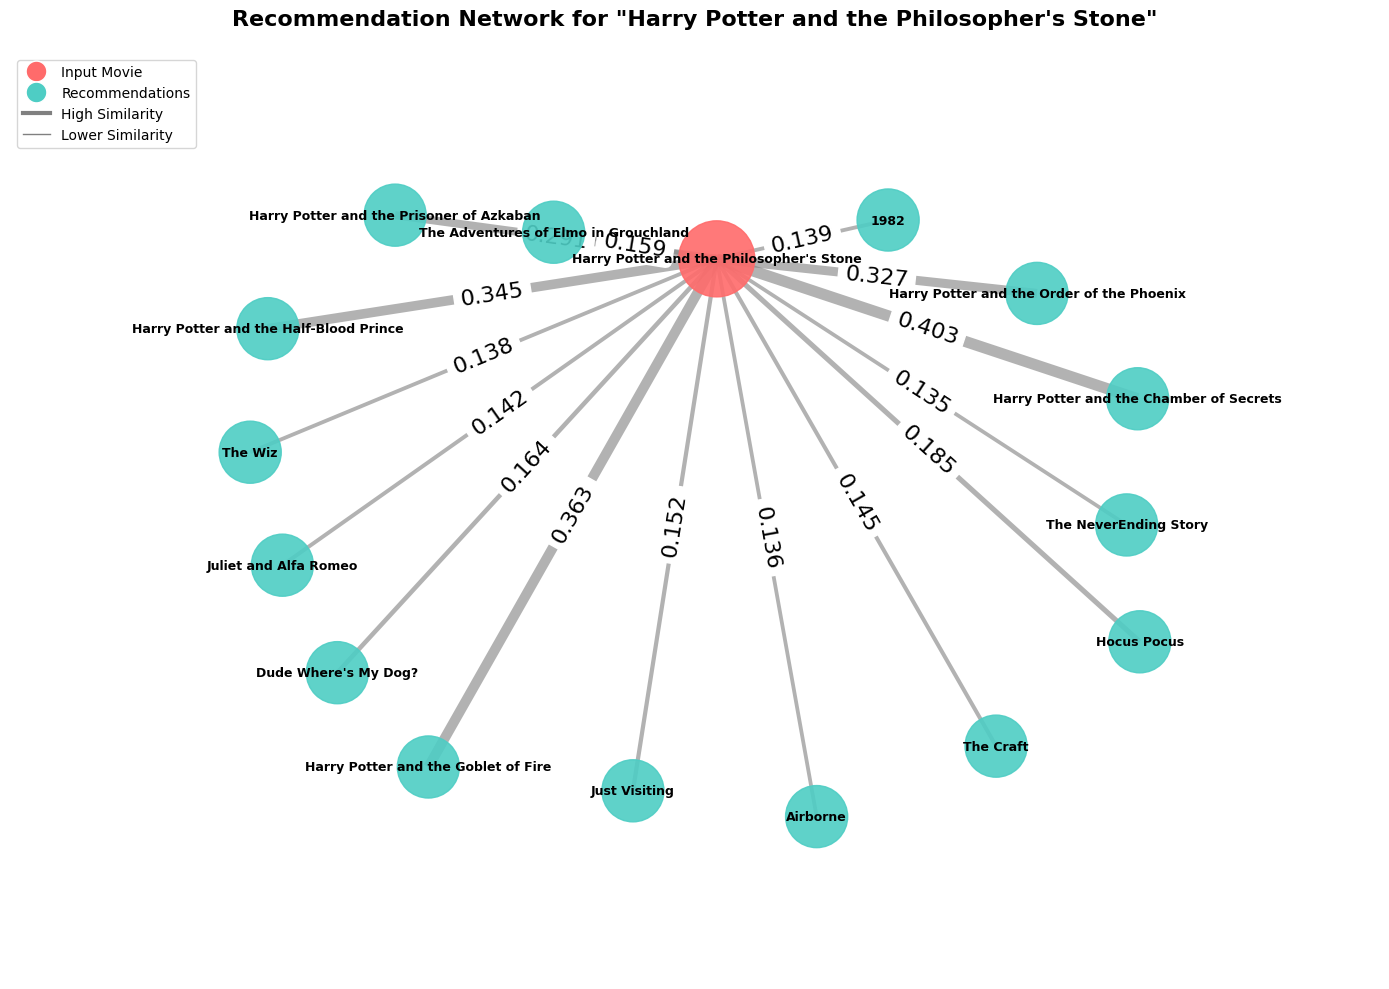

In [112]:
create_network_graph("Harry Potter and the Philosopher's Stone", r_t_4, save_path=None)
print("Network graph using TF-IDF vectorization generated successfully.\n")

Network graph using Sentence Transformer vectorization generated successfully.



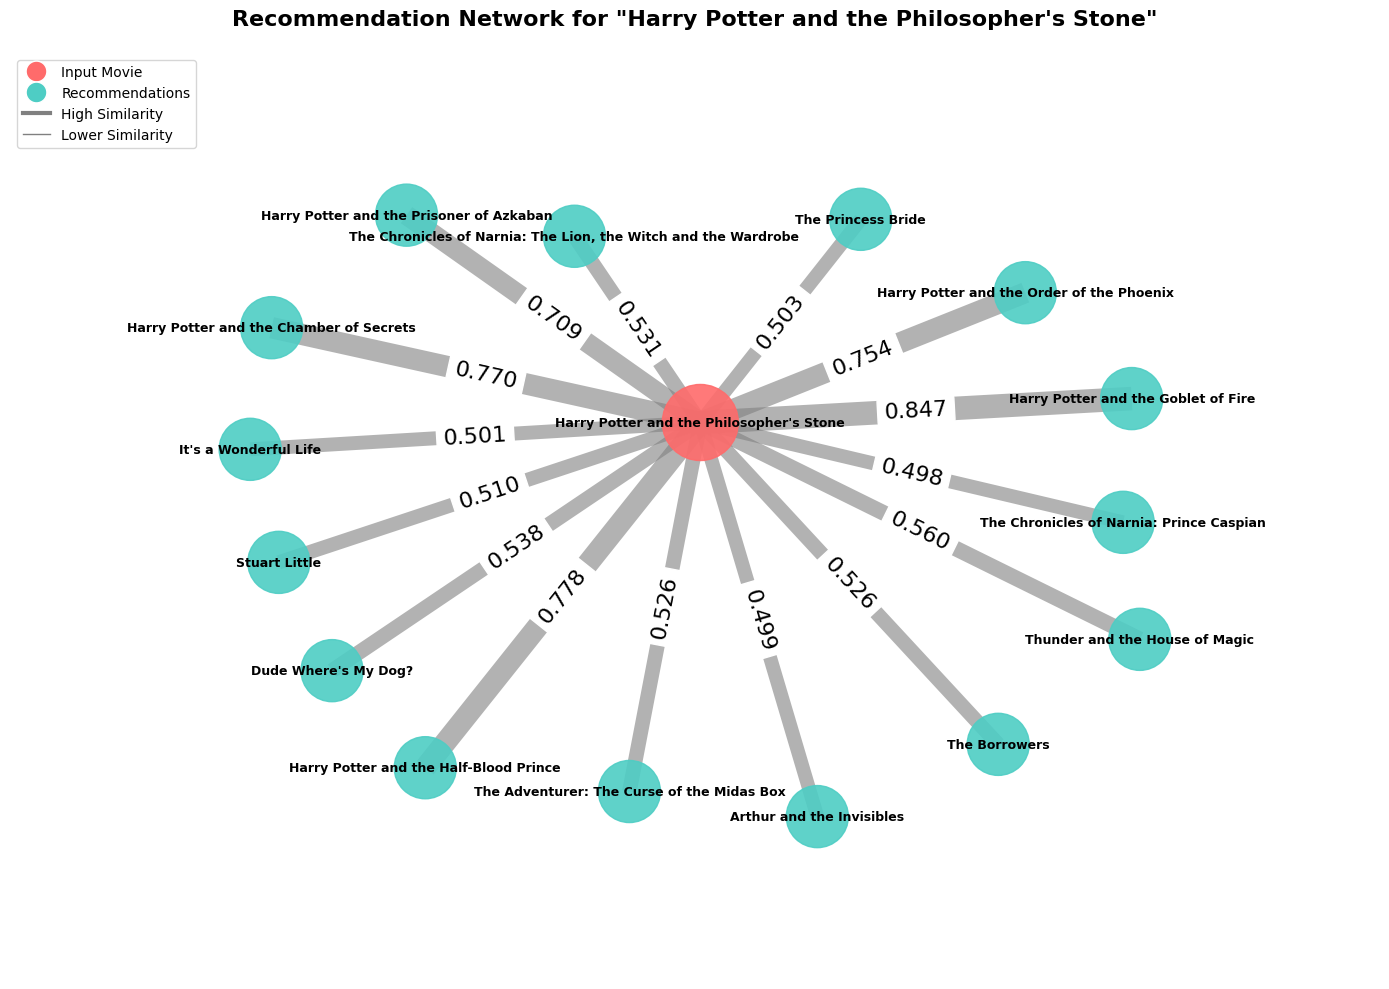

In [113]:
create_network_graph("Harry Potter and the Philosopher's Stone", r_s_4, save_path=None)
print("Network graph using Sentence Transformer vectorization generated successfully.\n")